<a href="https://colab.research.google.com/github/MiguelAngelZZ/IA/blob/master/taller_gradiente_decendiente_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Ajuste de Regresión Líneal (29 Enero 2021)
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy import stats, polyval
import itertools
import os


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
arbol=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MINERIA/base_arboles.csv", sep = ';')

Text(0, 0.5, 'Volumen')

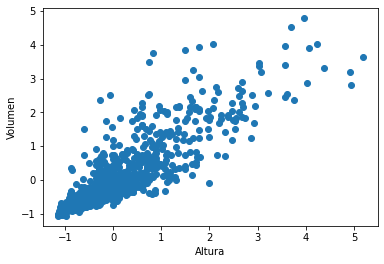

In [4]:
arbol.dropna(inplace=True)
y = arbol['altura'].values
x = arbol['diametro'].values

(y_mean, y_std) = (y.mean(), y.std())
(x_mean, x_std) = (x.mean(), x.std())

z_y = (y - y_mean)/ y_std
z_x = (x - x_mean)/ x_std

plt.scatter(z_x, z_y)
plt.xlabel('Altura')
plt.ylabel('Volumen')

In [5]:
# Crear matriz expandida de X
n_samples = z_x.shape[0]
X_ = np.c_[np.ones(n_samples), z_x]
X_[:6]

array([[ 1.        , -0.59832558],
       [ 1.        , -0.00297375],
       [ 1.        ,  1.05972934],
       [ 1.        ,  0.89005401],
       [ 1.        , -0.95553668],
       [ 1.        ,  0.59237809]])

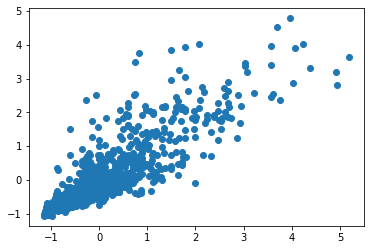

In [6]:
beta_0 = np.array([-1,1])
def myLR(beta, xc):
    return np.dot(beta, xc.T)

# scatter plot
plt.scatter(z_x, z_y)

# Plot the linear regression
xc = np.c_[np.ones(2), [z_x.min(), z_x.max()]]

In [7]:
#Calculando el error de regresión:

# Cost function
def costFun(beta, x, y):
    res = 0
    for ii in range(x.shape[0]):
        res += 1 / (2*x.shape[0])*(myLR(beta,x[ii, :]) - y[ii]) ** 2
    return res
costFun(beta_0, xc, z_y)

5.577660467051906

Text(0, 0.5, 'J(beta)')

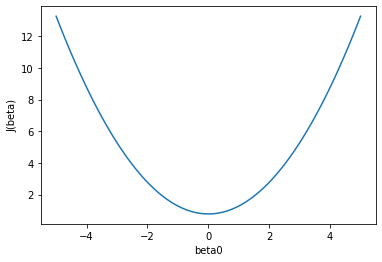

In [8]:
#Iterando los valores de  β  para entender la función de costo.

beta0 = np.linspace(-5, 5, 100)
#beta0 = np.linspace(-1, 1, 100)

#beta0 = np.arange(-15, 20, 1)
beta1 = 2

cost1=[]
for b_0 in beta0:
    cost1.append(costFun(np.array([b_0, beta1]), X_, z_y) )

plt.plot(beta0, cost1)
plt.xlabel('beta0')
plt.ylabel('J(beta)')

In [9]:
beta0[cost1==min(cost1)]
#array 0
#el valor qu minimiza la función

array([-0.05050505,  0.05050505])

In [10]:

beta0 = np.arange(-5, 7, 0.5)
beta1 = np.arange(-5, 7, 0.5)

cost = pd.DataFrame(index=beta0, columns=beta1)

for beta_0 in beta0: # para todas las convinaciones posibles
    for beta_1 in beta1:
        cost.loc[beta_0, beta_1] = costFun(np.array([beta_0, beta_1]), X_, z_y)

betas = np.transpose([np.tile(beta0, beta1.shape[0]), np.repeat(beta1, beta0.shape[0])])

In [11]:
betas

array([[-5. , -5. ],
       [-4.5, -5. ],
       [-4. , -5. ],
       ...,
       [ 5.5,  6.5],
       [ 6. ,  6.5],
       [ 6.5,  6.5]])

In [12]:
cost.where(cost==cost.values.min()).dropna(how="all").dropna(axis=1)

,1.0
0.0,0.137019


In [13]:
import numpy as np
betaInit = np.array([-1.5, 2]) # valores iniciales

def gradiente(beta, x, y): # veta vector de betas
    Gbeta_0  = 1/x.shape[0]*((myLR(beta, x)-y).sum()) #
    Gbeta_1  = 1/x.shape[0]*((myLR(beta, x)-y)*x[:, 1]).sum()
    return np.array([Gbeta_0, Gbeta_1]) # retorna los valores actualizados

gradiente(betaInit, X_, z_y)

array([-1.5       ,  1.13701872])

In [ ]:
#altura (y)=bo + b1*diametro +b2*perimetro+ b3*altura_fus

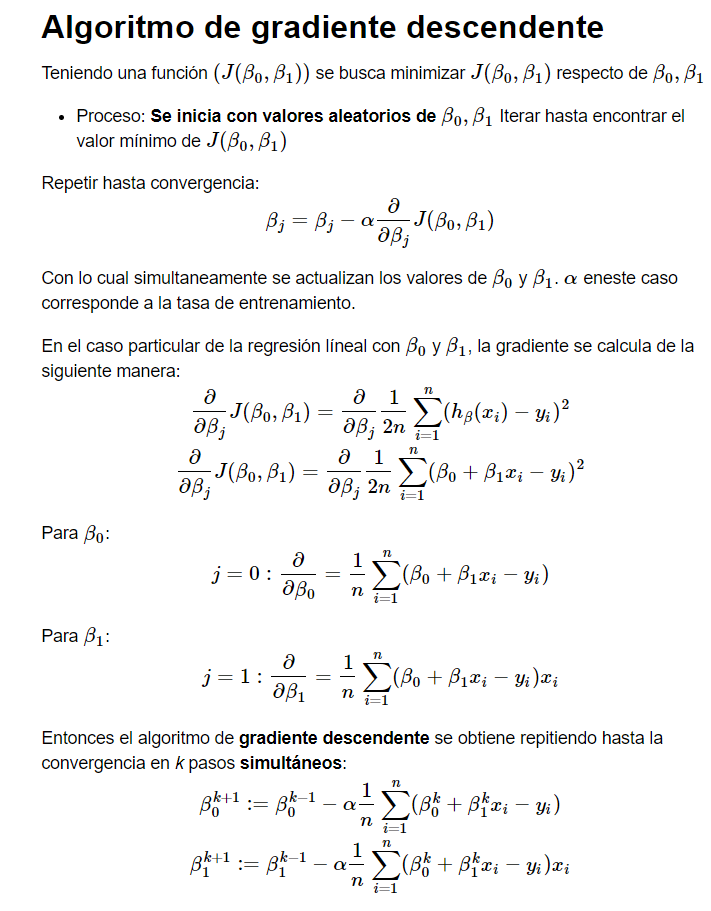


#TALLER


In [47]:
z_y = (y - y_mean)/ y_std

arbol.dropna(inplace=True)

y = arbol['altura'].values

x1 = arbol['diametro'].values
x2 =arbol['perimetro'].values
x3=arbol['altura_fus'].values

(y_mean, y_std) = (y.mean(), y.std())

(x1_mean, x1_std) = (x1.mean(), x1.std())
(x2_mean, x2_std) = (x2.mean(), x2.std())
(x3_mean, x3_std) = (x3.mean(), x3.std())



z_x1 = (x1 - x1_mean)/ x1_std
z_x2= (x2 - x2_mean)/ x2_std
z_x3= (x3 - x3_mean)/ x3_std



n1_samples = z_x1.shape[0]
X_1 = np.c_[np.ones(n1_samples), z_x1]
X_1[:6]

n2_samples = z_x2.shape[0]
X_2 = np.c_[np.ones(n2_samples), z_x2]
X_2[:6]


n3_samples = z_x3.shape[0]
X_3 = np.c_[np.ones(n3_samples), z_x3]
X_3[:6]

X_ = np.c_[[z_x1,z_x2,z_x3]]


betas=[10,10,10,10]
def gradiente(betas, x1,x2,x3, y): # veta vector de betas
    Gbeta_0  = 1/x1.shape[0]*(myLR(betas[0], x1)+myLR(betas[1], x1)+ myLR(betas[2], x2)+ myLR(betas[3], x3)-y).sum()#
    Gbeta_1  = 1/x1.shape[0]*(myLR(betas[0], x1)+myLR(betas[1], x1)+myLR(betas[2], x2)+ myLR(betas[3],x3)-y*x1[:, 1]).sum()
    Gbeta_2  = 1/x1.shape[0]*(myLR(betas[0], x1)+myLR(betas[1], x1)+myLR(betas[2], x2)+ myLR(betas[3], x3)-y*x2[:, 1]).sum()
    Gbeta_3  = 1/x1.shape[0]*(myLR(betas[0], x1)+myLR(betas[1], x1)+myLR(betas[2], x2)+ myLR(betas[3], x3)-y*x3[:, 1]).sum()
    return np.array([Gbeta_0, Gbeta_1,Gbeta_2,Gbeta_3]) # retorna los valores actualizados
    
#gradiente(beta0,beta1,beta2,beta3, X_1,X_2,X_3,z_y)
gradiente(betas, X_1,X_2,X_3,z_y)

array([40.        , 38.27403743, 38.36522753, 38.32696472])

In [48]:
# Cost function
#def costFun(beta, x, y):
 #   res = 0
 #   for ii in range(x.shape[0]):
 #       res += 1 / (2*x.shape[0])*(myLR(beta,x[ii, :]) - y[ii]) ** 2
 #   return res
#costFun(beta_0, xc, z_y)

In [49]:
# Cost function
def costFun(beta, X_1,X_2,X_3, y):
    res = 0
    for ii in range(x.shape[0]):
        res += 1 / (2*x.shape[0])*((myLR(beta[0],X_1[ii, :])+myLR(beta[1],X_1[ii, :])+myLR(beta[2],X_2[ii, :])+myLR(beta[3],X_3[ii, :])) - y[ii]) ** 2
    return res[0]
    
costFun(betas, X_1,X_2,X_3, z_y)

800.4999999999995

In [52]:
def gradienteDesc(x, y, betaInit, rate, itera): 
    betas = np.zeros((itera, betaInit.shape[0] + 1)) # almacena los valores de betas generadas
    beta = betaInit
    for ii in range(itera):
        betas[ii, :-1] = beta # los dos ulitmos btas del vector
        betas[ii, -1] = costFun(beta, X_1,X_2,X_3, z_y) # aplica la función d ecosto a los vetas definidos
        beta -= rate * gradiente(beta,  X_1,X_2,X_3,z_y)# en cada siguiente paso actualiza y resta TASA DE ENTRENAMIENTO POR AL GRAFIENTE

    return betas
import numpy as np
itera = 250
rate = 0.05
betaInit = np.array([5., 5.,5,5])

betas =  gradienteDesc(X_, z_y, betaInit, rate, itera)
betas

array([[  5.        ,   5.        ,   5.        ,   5.        ,
        200.5       ],
       [  4.        ,   4.08629813,   4.08173862,   4.08365176,
        132.55868981],
       [  3.18741557,   3.36001183,   3.35089282,   3.3547191 ,
         88.32152573],
       ...,
       [-15.22715523,   6.0884825 ,   4.96228482,   5.43483049,
          1.29183886],
       [-15.29007736,   6.1118585 ,   4.98110132,   5.45556012,
          1.29183886],
       [-15.35299949,   6.1352345 ,   4.99991781,   5.47628976,
          1.29183886]])

In [45]:
betas

array([[ 10.        ,  10.        ,  10.        ,  10.        ,
        800.5       ],
       [  8.        ,   8.08629813,   8.08173862,   8.08365176,
        520.58570607],
       [  6.38741557,   6.56001183,   6.55089282,   6.5547191 ,
        339.88042914],
       ...,
       [-15.22715523,   6.0884825 ,   4.96228482,   5.43483049,
          1.29183886],
       [-15.29007736,   6.1118585 ,   4.98110132,   5.45556012,
          1.29183886],
       [-15.35299949,   6.1352345 ,   4.99991781,   5.47628976,
          1.29183886]])

In [42]:
# X_1,X_2,X_3
betas=[10,10,10,10]
def gradienteDesc(x, y, betas, rate, itera): 
    betas = np.zeros((itera, 4 + 1)) # almacena los valores de betas generadas
    beta = betaInit
    for ii in range(itera):
        betas[ii, :-1] = beta # los dos ulitmos btas del vector
        betas[ii, -1] = costFun(beta, x, y) # aplica la función d ecosto a los vetas definidos
        beta -= rate * gradiente(beta, x, y)# en cada siguiente paso actualiza y resta TASA DE ENTRENAMIENTO POR AL GRAFIENTE

    return betas
import numpy as np
itera = 250
rate = 0.05
betaInit = np.array([10., 10.,10,10])

betas =  gradienteDesc(X_, z_y, betas, rate, itera)


TypeError: ignored